In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *
from mlxtend.preprocessing import minmax_scaling

In [18]:
def transform(initial, ind):
    # remove and subtract baseline
    c = frameToSecDF(initial.sub(initial['baseline'], axis = 'rows').drop('baseline', axis = 1).T)
    # drop 70
    a = [a - b > 70 for a, b in zip(list(c.max(axis = 1)), list(c.min(axis= 0)))]
    dropped = []
    for i in range(len(a)):
        if not a[i]:
            dropped.append(list(c.T)[i])
    c = c.drop(dropped, axis = 0)
    # -1 1 scale
    last = c[c.columns[-15:]]
    last = last.mean(axis=1)
    ne = c.sub(last, axis = 0)
    n_one = ne.div(ne.abs().max(axis = 1), axis = 0)
    l = lambda name: "sheet" + str(ind) + '_' + name
    n_one = n_one.rename(index = l)
    return n_one

In [19]:
excel = pd.ExcelFile(r"data\\191022_Areas1-7.xlsx")
excel.sheet_names

['191022_Area1_file01',
 '191022_Area2_file03',
 '191022_Area3_file05',
 '191022_Area4_file07',
 '191022_Area5_file09',
 '191022_Area6_file11',
 '191022_Area7_file13']

In [20]:
i = 0
n = transform(pd.read_excel(r"data\\191022_Areas1-7.xlsx",sheet_name=excel.sheet_names[i], header=0), i)
for i in range(1, len(excel.sheet_names)):
    print(i)
    n = n.append(transform(pd.read_excel(r"data\\191022_Areas1-7.xlsx",sheet_name=excel.sheet_names[i], header=0), i))
n

1
2
3
4
5
6


,0.000000,0.374532,0.749064,1.123596,1.498127,1.872659,2.247191,2.621723,2.996255,3.370787,...,71.161049,71.535581,71.910112,72.284644,72.659176,73.033708,73.408240,73.782772,74.157303,74.531835
sheet0_wave_01,-0.294867,1.000000,0.596423,0.206491,0.716606,0.542389,0.314085,0.174019,0.598481,0.655858,...,0.068901,0.156192,0.018414,-0.312152,0.147895,0.020146,0.053363,-0.006600,-0.051105,-0.191970
sheet0_wave_02,-0.524128,1.000000,0.272950,0.331911,0.784598,0.704290,0.589621,0.535756,0.494562,0.676659,...,-0.060136,0.187413,0.083143,-0.072437,0.102054,-0.029326,-0.039651,0.121262,-0.067208,-0.177761
sheet0_wave_03,-0.357266,-0.130105,0.049179,0.114687,0.151531,0.452050,0.343925,0.435317,0.682498,0.811412,...,0.022122,-0.007782,0.089157,-0.101759,0.106092,-0.000146,-0.057510,0.093922,0.096958,-0.057535
sheet0_wave_04,-0.540725,0.018498,-0.061182,-0.310143,0.362711,0.202582,0.033924,-0.285876,0.290258,0.261828,...,-0.261572,0.247557,0.321807,-0.088622,0.153204,-0.288095,-0.104451,0.138090,0.228371,-0.325624
sheet0_wave_05,-0.357354,0.282112,0.337382,-0.036446,0.670574,0.554834,1.000000,0.270830,0.537488,0.838682,...,0.183701,0.159807,0.035980,-0.021674,0.363091,-0.204571,-0.237225,0.215560,0.056299,-0.440768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sheet6_wave_133,-0.206293,-0.213787,-0.159927,-0.179299,-0.185910,-0.083748,-0.196038,-0.194370,-0.166647,-0.136626,...,-0.037495,-0.025224,0.032187,-0.013286,-0.036558,0.007844,0.026847,-0.061587,-0.010628,0.039402
sheet6_wave_134,-0.228168,-0.120919,-0.020648,0.022916,0.044635,0.141983,0.253170,0.180035,0.252696,0.280530,...,0.020192,0.055541,0.012461,-0.008705,-0.013846,-0.084631,-0.064125,-0.054048,-0.057211,0.007211
sheet6_wave_135,-1.000000,-0.910947,-0.885136,-0.848280,-0.851317,-0.749019,-0.818654,-0.826092,-0.726924,-0.650936,...,0.027820,-0.045804,0.051228,0.016485,-0.069351,-0.089175,0.011921,-0.021967,0.064566,0.087979
sheet6_wave_136,-0.913358,-0.982317,-0.997470,-0.937088,-1.000000,-0.957523,-0.888693,-0.999560,-0.932206,-0.997342,...,-0.029839,-0.020237,0.041890,-0.017406,-0.053802,-0.044462,0.081033,0.056502,0.052428,-0.083629


# Removal

In [21]:
a = [a - b > 70 for a, b in zip(list(n.max(axis = 1)), list(n.min(axis= 0)))]
dropped = []
for i in range(len(a)):
    if not a[i]:
        dropped.append(list(n.T)[i])
n = n.drop(dropped, axis = 0)

# -1 1 scaling

In [22]:
def oneneg(n, last):
    last = n[n.columns[-last:]]
    last = last.mean(axis=1)
    ne = n.sub(last, axis = 0)
    n_one = ne.div(ne.abs().max(axis = 1), axis = 0)
    return n_one

In [23]:
last = n[n.columns[-15:]]
last = last.mean(axis=1)
ne = n.sub(last, axis = 0)
n_one = ne.div(ne.abs().max(axis = 1), axis = 0)
n_one

,0.000000,0.374532,0.749064,1.123596,1.498127,1.872659,2.247191,2.621723,2.996255,3.370787,...,71.161049,71.535581,71.910112,72.284644,72.659176,73.033708,73.408240,73.782772,74.157303,74.531835
sheet0_wave_207,0.235713,-0.417720,0.285239,-0.369922,0.107301,0.134962,0.030016,-0.221917,0.042196,-0.300024,...,0.137456,-0.043436,0.149761,-0.176572,-0.018882,-0.273254,0.148340,-0.006354,0.042642,0.026031
sheet0_wave_208,-0.853367,-0.887323,-0.387530,-0.825427,-0.280831,-0.425220,-0.572937,-0.859689,-0.505483,-0.404061,...,0.660111,0.152835,0.208613,0.044199,0.137349,-0.047217,-0.493782,-0.058969,0.032804,-0.307368
sheet0_wave_209,0.038433,-0.110338,-0.082611,-0.371253,-0.306371,-0.228752,-0.022171,-0.461516,0.130102,-0.207794,...,-0.078799,0.084626,0.317115,-0.113374,0.134984,-0.017798,0.079029,0.017278,0.184074,-0.247113
sheet0_wave_210,-0.685258,-0.619505,-0.489252,-0.576978,-0.690015,-0.333512,-0.625440,-0.678766,-0.543446,-0.747808,...,-0.052430,0.216656,-0.001392,-0.004446,0.023704,-0.123579,-0.171065,0.192031,-0.191639,-0.102863
sheet0_wave_211,0.634056,0.520197,0.330902,0.283196,-0.151050,-0.388692,-0.358500,-0.281210,0.401226,0.049956,...,-0.213894,0.055136,0.034373,0.235208,-0.065578,0.353674,0.262356,0.023312,0.001711,-0.297767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sheet6_wave_133,-0.206293,-0.213787,-0.159927,-0.179299,-0.185910,-0.083748,-0.196038,-0.194370,-0.166647,-0.136626,...,-0.037495,-0.025224,0.032187,-0.013286,-0.036558,0.007844,0.026847,-0.061587,-0.010628,0.039402
sheet6_wave_134,-0.228168,-0.120919,-0.020648,0.022916,0.044635,0.141983,0.253170,0.180035,0.252696,0.280530,...,0.020192,0.055541,0.012461,-0.008705,-0.013846,-0.084631,-0.064125,-0.054048,-0.057211,0.007211
sheet6_wave_135,-1.000000,-0.910947,-0.885136,-0.848280,-0.851317,-0.749019,-0.818654,-0.826092,-0.726924,-0.650936,...,0.027820,-0.045804,0.051228,0.016485,-0.069351,-0.089175,0.011921,-0.021967,0.064566,0.087979
sheet6_wave_136,-0.913358,-0.982317,-0.997470,-0.937088,-1.000000,-0.957523,-0.888693,-0.999560,-0.932206,-0.997342,...,-0.029839,-0.020237,0.041890,-0.017406,-0.053802,-0.044462,0.081033,0.056502,0.052428,-0.083629


<IPython.core.display.Javascript object>


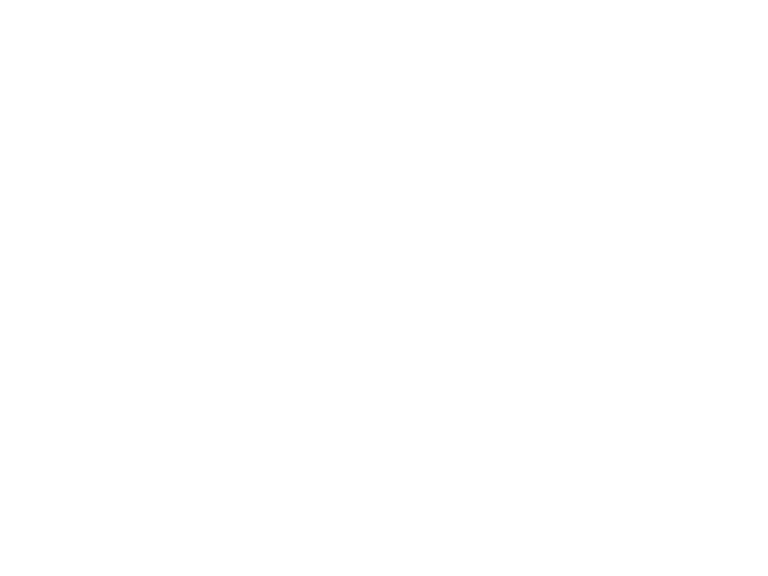

In [24]:
n_one.T.plot(legend=False)

<IPython.core.display.Javascript object>


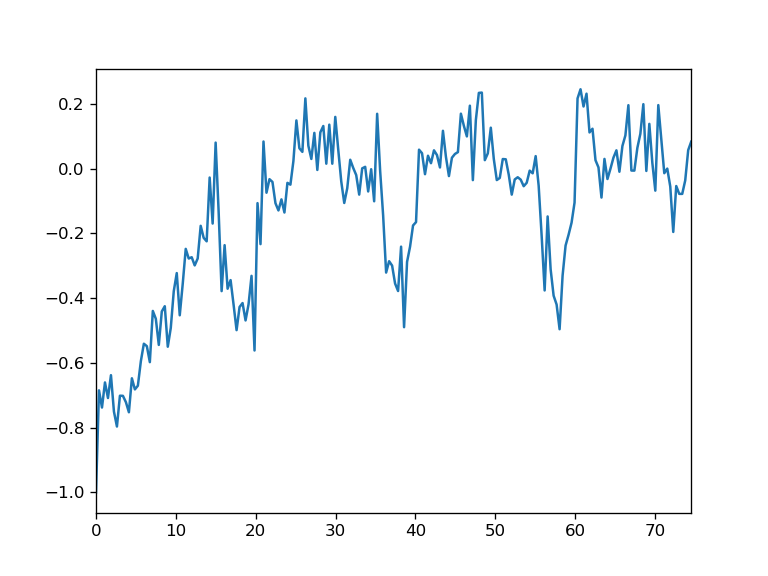

In [25]:
%matplotlib notebook
n_one.T['sheet6_wave_13'].plot()

# PCA - to do

# DBSCAN

In [26]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [27]:
# choose which n to use
n = n_one

In [28]:
db = DBSCAN(eps=2.8, min_samples=2).fit(n)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dlabels = db.labels_
print(max(dlabels + 1))
dlabels + 1

9


array([0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,

In [29]:
data = {'in': list(n.index), 'out': list(dlabels + 1)}
doutdf = pd.DataFrame.from_dict(data)
doutdf

,in,out
0,sheet0_wave_207,0
1,sheet0_wave_208,0
2,sheet0_wave_209,0
3,sheet0_wave_210,1
4,sheet0_wave_211,0
...,...,...
772,sheet6_wave_133,2
773,sheet6_wave_134,2
774,sheet6_wave_135,1
775,sheet6_wave_136,1


<IPython.core.display.Javascript object>


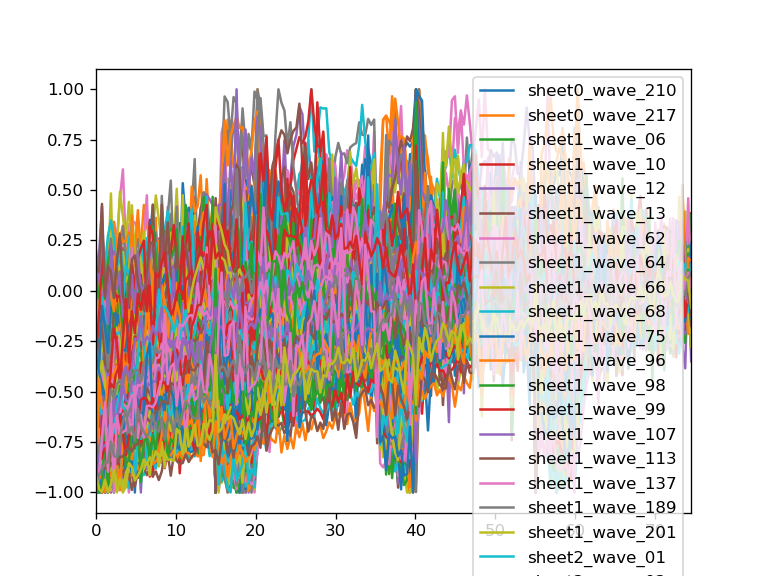

<IPython.core.display.Javascript object>


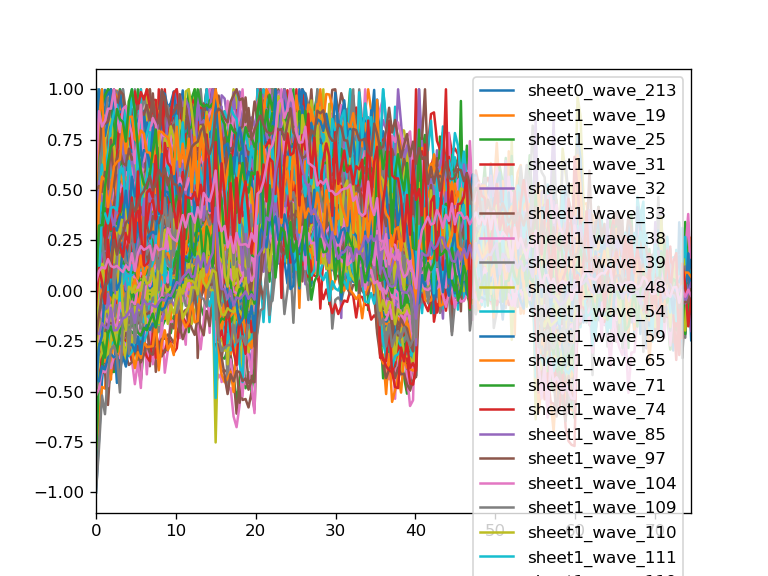

<IPython.core.display.Javascript object>


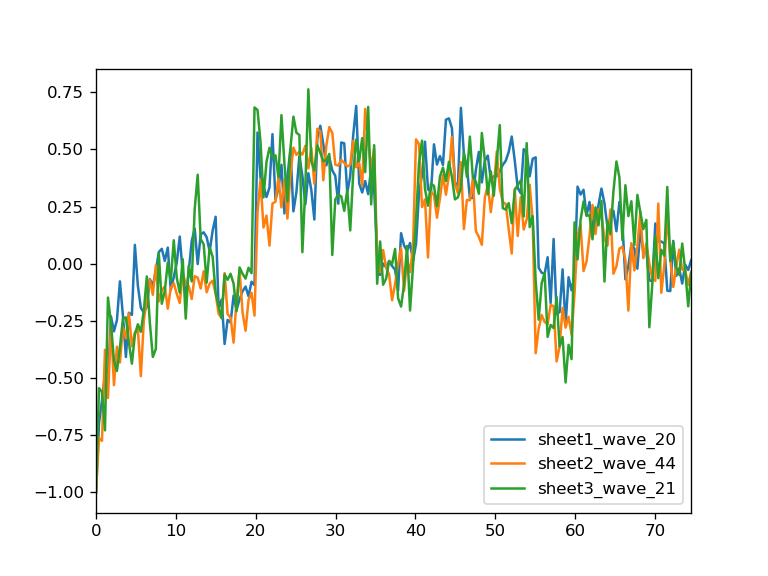

<IPython.core.display.Javascript object>


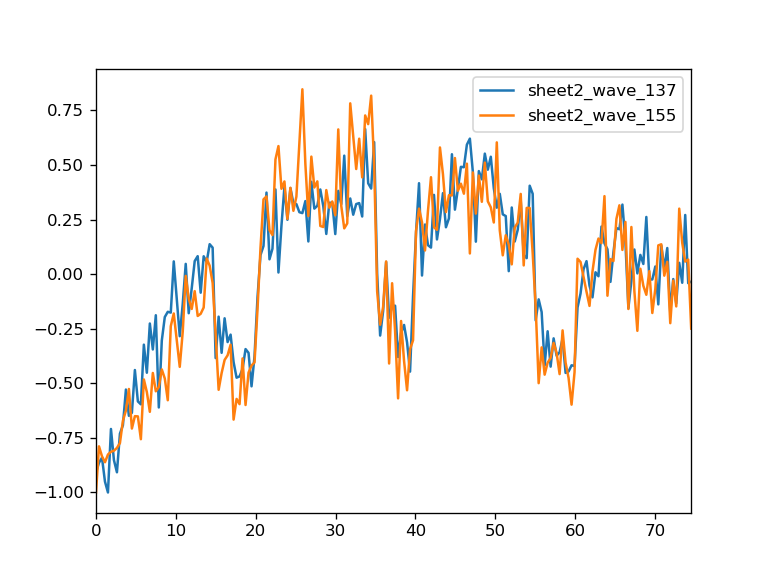

<IPython.core.display.Javascript object>


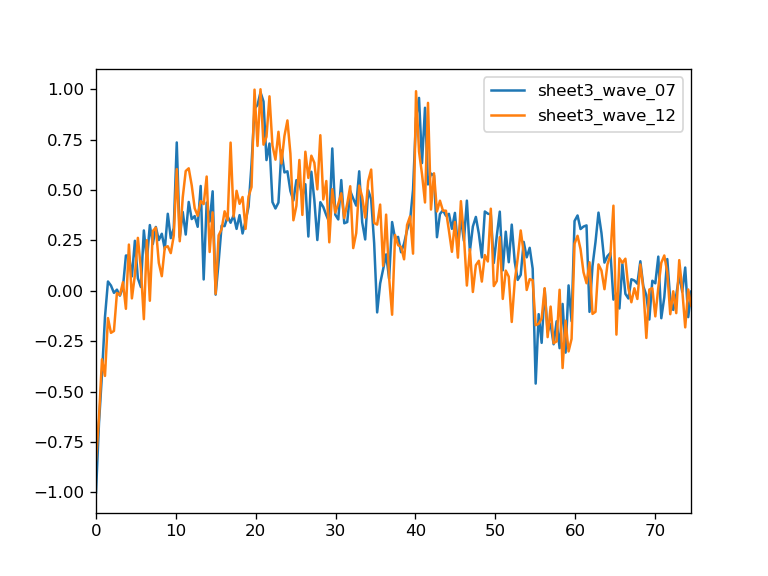

<IPython.core.display.Javascript object>


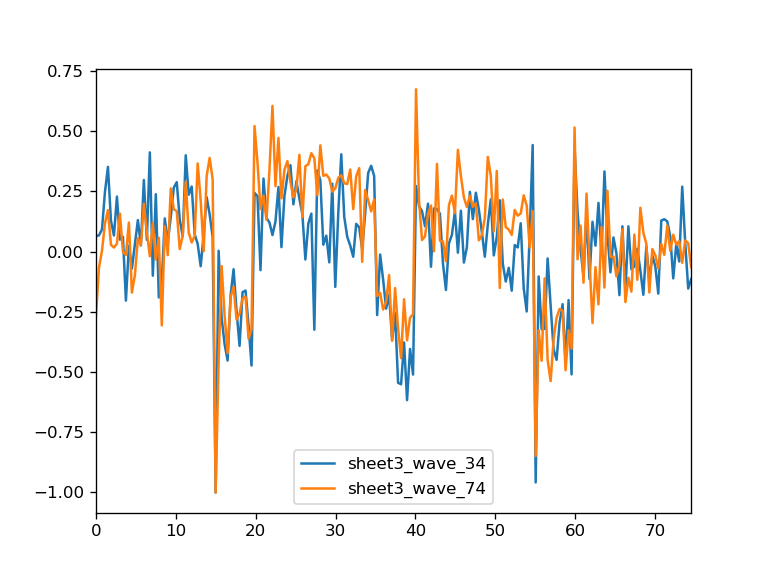

<IPython.core.display.Javascript object>


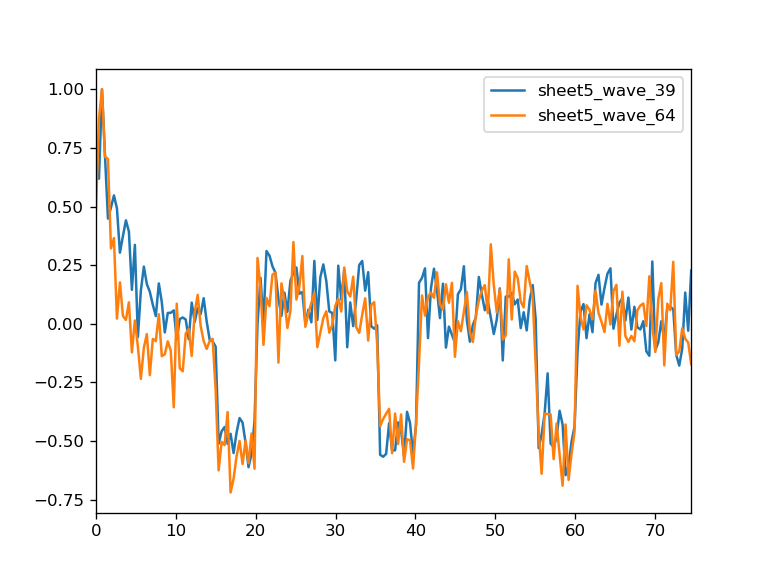

<IPython.core.display.Javascript object>


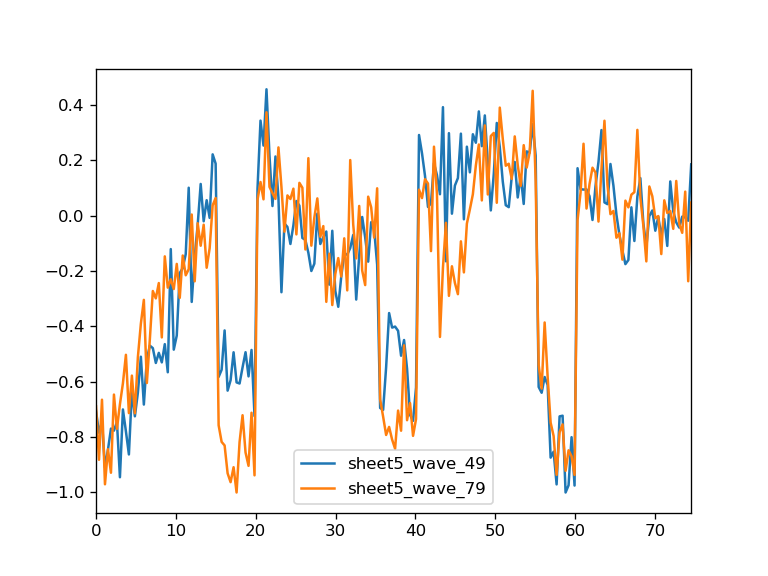

<IPython.core.display.Javascript object>


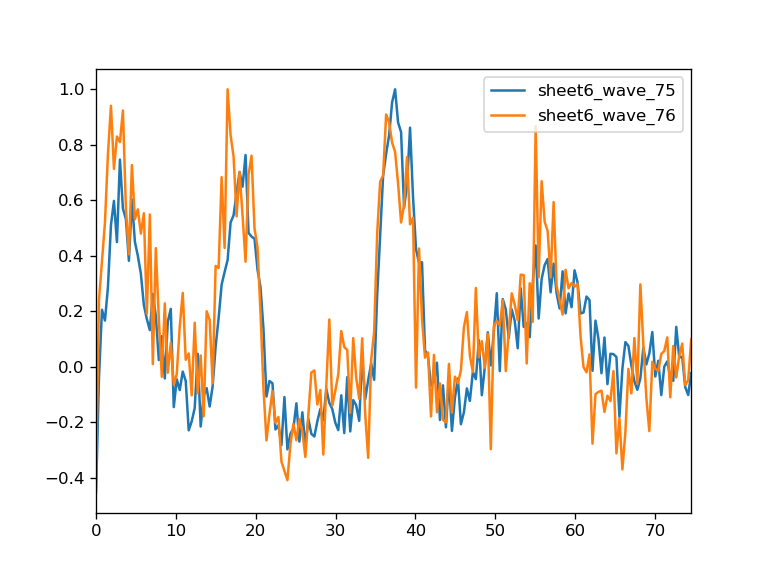

In [30]:
for i in range(1, max(doutdf['out']) + 1):
    z = n.T[list(doutdf.loc[doutdf['out'] == i]['in'])].T
    z.T.plot()